### 6. Batch Normalization 
Paper: https://arxiv.org/pdf/1502.03167.pdf  
Soluciona el problema de la "Covariate Shift" acelerando el entrenamiento y nos da de regalo regularización  

Paper efecto regularizador: 

https://arxiv.org/abs/1809.00846

Paper de le interferencia entre dropout y batchnormalization:  
https://arxiv.org/abs/1801.05134

![images/batch_norm.webp](images/batch_norm.webp)

$\beta$ reemplaza al bias, por lo que puede usarse en la capa densa:
use_bias=False

En el momento de testing, se usa una promediación sobre todos los batches de los $\mu_B$ y $\sigma^2_B$ (Exponential Weighted Average)

/opt/anaconda3/envs/deep/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


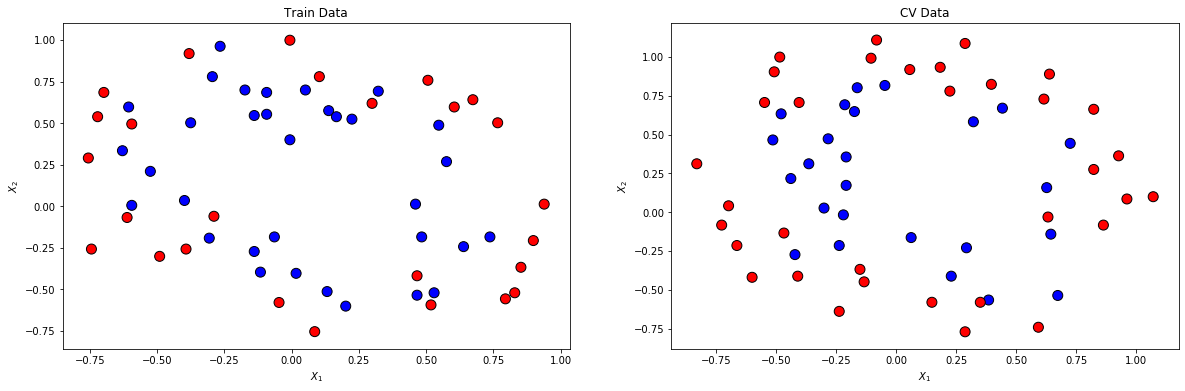

In [1]:
import numpy as np
import reg_helper as RHelper
import draw_nn
from matplotlib import pyplot as plt 
folder = 'data/'
X_train = np.load(folder+'X_train.npy')
X_test = np.load(folder+'X_test.npy')
y_train = np.load(folder+'y_train.npy') 
y_test = np.load(folder+'y_test.npy')

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X_train, y_train, ax=ax1)
RHelper.plot_boundaries(X_test, y_test, ax=ax2)
ax1.set_title('Train Data')
ax2.set_title('CV Data')
ax1.set_xlabel('$X_1$')
ax1.set_ylabel('$X_2$')
ax2.set_xlabel('$X_1$')
ax2.set_ylabel('$X_2$')
plt.show()

In [2]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation
from keras import optimizers
from fnn_helper import PlotLosses

In [113]:
hidden_units = 20
input_shape = 2
output_size = 1

In [64]:
def get_BN_model():
    # Con BatchNormalization
    model_bn = Sequential()
    model_bn.add(Dense(hidden_units,input_dim=input_shape, use_bias=False))
    model_bn.add(BatchNormalization())
    model_bn.add(Activation('sigmoid'))
    model_bn.add(Dense(output_size, use_bias=False))
    model_bn.add(BatchNormalization())
    model_bn.add(Activation('sigmoid'))
    return model_bn
model_bn = get_BN_model()
model_bn.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 20)                40        
_________________________________________________________________
batch_normalization_21 (Batc (None, 20)                80        
_________________________________________________________________
activation_29 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 20        
_________________________________________________________________
batch_normalization_22 (Batc (None, 1)                 4         
_________________________________________________________________
activation_30 (Activation)   (None, 1)                 0         
Total params: 144
Trainable params: 102
Non-trainable params: 42
______________________________________________________

In [65]:
def get_model():
    # # sin BatchNormalization
    model_nbn = Sequential()
    model_nbn.add(Dense(hidden_units,input_dim=input_shape))
    model_nbn.add(Activation('sigmoid'))
    model_nbn.add(Dense(output_size))
    model_nbn.add(Activation('sigmoid'))

    return model_nbn

model_nbn = get_model()
model_nbn.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 20)                60        
_________________________________________________________________
activation_31 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 21        
_________________________________________________________________
activation_32 (Activation)   (None, 1)                 0         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


- Cuales son los non-trainable parameters?
- Donde va la capa de batch normalization?

In [66]:
from keras.callbacks import ReduceLROnPlateau

In [67]:
ropcb = ReduceLROnPlateau(monitor='loss', verbose=1, min_lr=0.00001)

In [122]:
model = get_BN_model()
# model = get_model()

lr = 0.3
# decay = 0
batch_size = 10
epochs = 1500
selectedOptimizer = optimizers.adam(lr=lr)
model.compile(loss = 'binary_crossentropy', optimizer=selectedOptimizer, metrics=['accuracy'])

history = model.fit(X_train, 
          y_train, batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          # callbacks=[ropcb],
         )

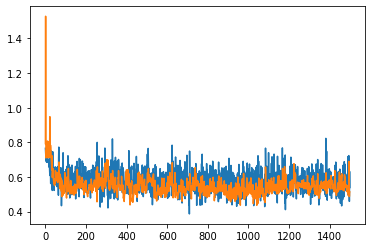

In [123]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

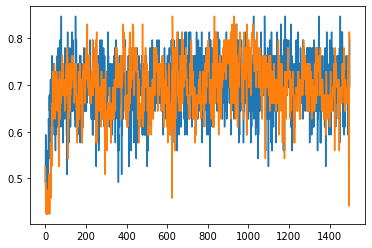

In [124]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [125]:
model.evaluate(X_train, y_train)

59/59 [==============================] - 0s 43us/step


[0.41425218925637713, 0.7966101765632629]

59/59 [==============================] - 0s 28us/step


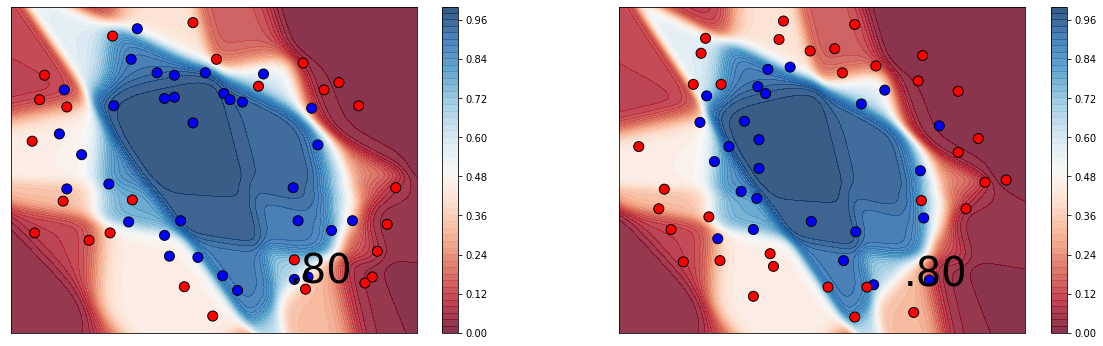

In [126]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries_keras(X_train, y_train, model.evaluate(X_train, y_train)[1], model.predict_proba, h = 0.01, margin=0.1, ax=ax1)
RHelper.plot_boundaries_keras(X_test, y_test, model.evaluate(X_test, y_test)[1], model.predict_proba, h = 0.01, margin=0.1, ax=ax2)
plt.show()

### Se puede ver que tiene un efecto de regularización sobre los pesos

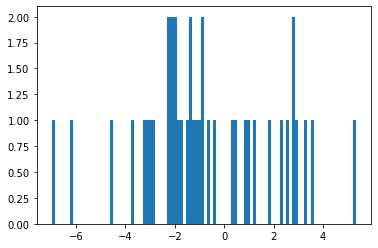

In [53]:
_ = plt.hist(model.get_weights()[0].reshape(-1), 100)

[Discución interesante](https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras)